<a href="https://colab.research.google.com/github/ljunwon1114/2022bioinfohw/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls -al /content/drive/MyDrive/binfo1-work/

total 7790255
-rw------- 1 root root 1370036258 May 12 08:55 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May 12 08:55 CLIP-35L33G.bam.bai
-rw------- 1 root root       7077 May 13 04:12 CLIP-let7g.bam
-rw------- 1 root root      14561 May 13 04:16 CLIP-let7g-gene.pileup
-rw------- 1 root root    2685065 May 13 04:14 CLIP-let7g.pileup
-rw------- 1 root root  567739792 May 13 01:14 filtered-RPF-siLuc.bam
-rw------- 1 root root   45957833 May 13 01:26 fivepcounts-RPF-siLuc.bed
-rw------- 1 root root     855103 May 13 01:04 gencode-exons-containing-startcodon.bed
-rw------- 1 root root  883334756 May 12 08:55 gencode.gtf
-rw------- 1 root root   26842797 May 13 00:54 gencode-plusexon.gtf
-rw------- 1 root root    1063832 May 13 00:53 gencode-start.gtf
-rw------- 1 root root   24065406 May  6 05:09 read-counts.txt
-rw------- 1 root root        751 May  6 05:09 read-counts.txt.summary
-rw------- 1 root root 1003658801 May 12 08:55 RNA-control.bam
-rw------- 1 root root    2276104 May 12

In [3]:
#checking MD5
!md5sum drive/MyDrive/binfo1-work/*

140aaf30bcb9276cc716f8699f04ddd6  drive/MyDrive/binfo1-work/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  drive/MyDrive/binfo1-work/CLIP-35L33G.bam.bai
0d33bf4b3a5ce22ba13a62323efd6883  drive/MyDrive/binfo1-work/CLIP-let7g.bam
4ea14471c5d4bf9ab1fd91b9a5b2193c  drive/MyDrive/binfo1-work/CLIP-let7g-gene.pileup
a53f66a5575d4ac2d3b4c44af576d44d  drive/MyDrive/binfo1-work/CLIP-let7g.pileup
d477bd9acca237bbc6e0fbd81cdc6c0b  drive/MyDrive/binfo1-work/filtered-RPF-siLuc.bam
7211785786bc63bf95a5bb678cad71c1  drive/MyDrive/binfo1-work/fivepcounts-RPF-siLuc.bed
ed47186ee44654792a8a130c695f3a22  drive/MyDrive/binfo1-work/gencode-exons-containing-startcodon.bed
d54d428f5872030c4ffc43058709b896  drive/MyDrive/binfo1-work/gencode.gtf
3469e3e3e018302c5488adc052fd1e21  drive/MyDrive/binfo1-work/gencode-plusexon.gtf
b1c38579a9e8e0313c1508f02ce0afaf  drive/MyDrive/binfo1-work/gencode-start.gtf
f691d94ca9c72e6feedbfe4561dd5b83  drive/MyDrive/binfo1-work/read-counts.txt
7c9528c08ed2f1ae6e2de599db1aa8fb

In [ ]:
!ls -al drive/MyDrive/binfo*

lrw------- 1 root root 0 May  6 04:32 drive/MyDrive/binfo1-datapack1 -> /content/drive/.shortcut-targets-by-id/1Y190lbO42VEzjjQkgoxNf_EcZJlHyZa1/binfo1-datapack1


In [1]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

fatal: destination path 'colab-biolab' already exists and is not an empty directory.
./
./root/
./root/.tmux.conf
./root/.bashrc.biolab
./root/.condarc
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.profile
./root/.vimrc
PREFIX=/root/conda
Unpacking payload ...
Solving environment: - \ | / done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /root/conda
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [2]:
#실습에 필요한 프로그램 설치
!conda install -y subread

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    subread-2.0.1              |       h7132678_2        22.9 MB  bioconda
    ------------------------------------------------------------
                                           Total:        22.9 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h7132678_2



subread-2.0.1        | 22.9 MB   | : 100% 1.0/1 [00:03<00:00,  3.89s/it]               
Preparing transaction: \ done
Verifying transact

## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다. 데이터가 있는 곳으로 이동해서 작업합시다.

In [4]:
%cd /content/drive/MyDrive/binfo1-datapack1/

/content/drive/MyDrive/binfo1-work


In [ ]:
!mkdir /content/drive/MyDrive/binfo1-work
!cp /content/drive/MyDrive/binfo1-datapack1/*.* /content/drive/MyDrive/binfo1-work/
!ls -al /content/drive/MyDrive/binfo1-work


total 7136706
-rw------- 1 root root 1370036258 May  6 04:56 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May  6 04:56 CLIP-35L33G.bam.bai
-rw------- 1 root root  883334756 May  6 04:57 gencode.gtf
-rw------- 1 root root 1003658801 May  6 04:57 RNA-control.bam
-rw------- 1 root root    2276104 May  6 04:57 RNA-control.bam.bai
-rw------- 1 root root 1260991122 May  6 04:57 RNA-siLin28a.bam
-rw------- 1 root root    2710744 May  6 04:57 RNA-siLin28a.bam.bai
-rw------- 1 root root  981684502 May  6 04:57 RNA-siLuc.bam
-rw------- 1 root root    2606104 May  6 04:57 RNA-siLuc.bam.bai
-rw------- 1 root root  737352902 May  6 04:58 RPF-siLin28a.bam
-rw------- 1 root root    2482768 May  6 04:58 RPF-siLin28a.bam.bai
-rw------- 1 root root 1055123479 May  6 04:58 RPF-siLuc.bam
-rw------- 1 root root    2605912 May  6 04:58 RPF-siLuc.bam.bai


In [5]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [6]:
%ls

CLIP-35L33G.bam                          read-counts.txt.summary
CLIP-35L33G.bam.bai                      RNA-control.bam
CLIP-let7g.bam                           RNA-control.bam.bai
CLIP-let7g-gene.pileup                   RNA-siLin28a.bam
CLIP-let7g.pileup                        RNA-siLin28a.bam.bai
filtered-RPF-siLuc.bam                   RNA-siLuc.bam
fivepcounts-RPF-siLuc.bed                RNA-siLuc.bam.bai
gencode-exons-containing-startcodon.bed  RPF-siLin28a.bam
gencode.gtf                              RPF-siLin28a.bam.bai
gencode-plusexon.gtf                     RPF-siLuc.bam
gencode-start.gtf                        RPF-siLuc.bam.bai
read-counts.txt


In [7]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 8 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o CLIP-let7g.bam                                 ||
||                           o filtered-RPF-siLuc.bam                         ||
||                           o RNA-control.bam                   

결과를 pandas로

In [8]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0


대충 그림을 그려 봅니다.

In [9]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,NaN,NaN


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


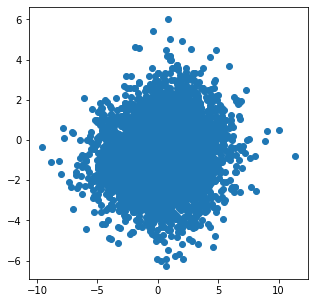

In [10]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

논문의 그림처럼 한 번 만들어 봅시다

## Protein localization 반영하기

논문 그림에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~


In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.



소수점 제거

In [21]:
import pandas as pd
cnts_d = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=False)

In [36]:
gene_int = cnts_d['Geneid'].str.split('.').str[0]
gene_int.head()

0    ENSMUSG00000102693
1    ENSMUSG00000064842
2    ENSMUSG00000051951
3    ENSMUSG00000102851
4    ENSMUSG00000103377
Name: Geneid, dtype: object

In [44]:
#소수점 제거 콜롬 대체
cnts_d['Geneid'] = gene_int
cnts_d

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0
1,ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,1,1,1,0,0
3,ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0
4,ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,chrM,13552,14070,-,519,1666,0,27,1976,6741,8052,11471,10842
55355,ENSMUSG00000064369,chrM,14071,14139,-,69,81,0,2,61,30,25,18,19
55356,ENSMUSG00000064370,chrM,14145,15288,+,1144,403,0,11235,4561,11885,10971,13872,11329
55357,ENSMUSG00000064371,chrM,15289,15355,+,67,185,0,3938,10,15,25,5257,3947


In [47]:
mouselocal['gene_id'].sort_values()
mouselocal

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus
...,...,...,...
9518,ENSMUSG00000117975,Itprip Kiaa1754,integral membrane
9519,ENSMUSG00000118332,Fam220a Acpin1 Sipar,nucleus
9520,ENSMUSG00000118346,Tmem179b,integral membrane
9521,ENSMUSG00000118504,NaN,integral membrane


In [46]:
cnts_d['Geneid'].sort_values()
cnts_d

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0
1,ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,1,1,1,0,0
3,ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0
4,ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,chrM,13552,14070,-,519,1666,0,27,1976,6741,8052,11471,10842
55355,ENSMUSG00000064369,chrM,14071,14139,-,69,81,0,2,61,30,25,18,19
55356,ENSMUSG00000064370,chrM,14145,15288,+,1144,403,0,11235,4561,11885,10971,13872,11329
55357,ENSMUSG00000064371,chrM,15289,15355,+,67,185,0,3938,10,15,25,5257,3947


정렬해서 합치려고 했으나, 수가 달라서 다른 방법을 쓰기로 함.

In [49]:
cnts_d.rename(columns={"Geneid":"gene_id"},inplace=True)
cnts_d.head()

,gene_id,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0
1,ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,1,1,1,0,0
3,ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0
4,ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0


In [53]:
cnts_m = pd.merge(cnts_d,mouselocal,on='gene_id')

cnts_m['clip_enrichment'] = cm['CLIP-35L33G.bam'] / cm['RNA-control.bam']
cnts_m['rden_change'] = (cm['RPF-siLin28a.bam'] / cm['RNA-siLin28a.bam']) / (cm['RPF-siLuc.bam'] / cm['RNA-siLuc.bam'])
cnts_m


,gene_id,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,Gene names,type,clip_enrichment,rden_change
0,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,1,1,1,0,0,Xkr4 Xrg4,integral membrane,4.000000,NaN
1,ENSMUSG00000025902,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,0,0,1,8,5,2,3,Sox17 Sox-17,nucleus,6.000000,0.416667
2,ENSMUSG00000025903,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,44,574,1219,1236,33,44,Lypla1 Apt1 Pla1a,cytoplasm,3.562718,0.760459
3,ENSMUSG00000002459,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4979799;4979799;4980625;4980697;4982537;498253...,4980885;4980885;4980885;4980885;4982771;498277...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4239,5,0,0,1,1,8,3,2,Rgs20 Rgsz1,nucleus,5.000000,12.000000
4,ENSMUSG00000025905,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5658689;5658716;5658716;5658780;5659164;565922...,5661534;5658886;5658886;5658886;5659528;565952...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,9151,49,0,7,1,20,20,8,7,Oprk1,integral membrane,49.000000,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,ENSMUSG00000064360,chrM,9459,9806,+,348,0,0,14,36,110,135,12,14,Mtnd3 mt-Nd3 Nd3,integral membrane,0.000000,1.051948
9519,ENSMUSG00000065947,chrM,9877,10173,+,297,4,0,4,12,8,4,4,4,Mtnd4l mt-Nd4l Nd4l,integral membrane,0.333333,0.500000
9520,ENSMUSG00000064363,chrM,10167,11544,+,1378,373,0,2411,2150,5028,4224,3292,2498,Mtnd4 mt-Nd4 Nd4,integral membrane,0.173488,1.107123
9521,ENSMUSG00000064367,chrM,11742,13565,+,1824,3665,0,4764,5281,15549,17408,5986,5305,Mtnd5 mt-Nd5 Nd5,integral membrane,0.693997,1.263275


이름을 일치시킨후, merge하였다.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


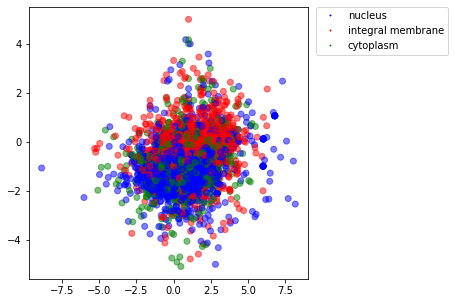

In [54]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

df = pd.DataFrame(dict(clip_enrichment=np.log2(cnts_m['clip_enrichment']), rden_change=np.log2(cnts_m['rden_change']), type=cnts_m['type']))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

colors = {'nucleus':'blue', 'integral membrane':'red', 'cytoplasm':'green'}
ax.scatter(df['clip_enrichment'], df['rden_change'], c=df['type'].map(colors), alpha=0.5)

nucleus_color = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='blue',label='nucleus',markersize=3)
integral_membrane_color = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='red',label='integral membrane',markersize=3)
cytoplasm_color = Line2D(range(1), range(1), color="white", marker='o', markerfacecolor='green',label='cytoplasm',markersize=3)

ax.legend(handles=[nucleus_color,integral_membrane_color,cytoplasm_color],loc='upper right', bbox_to_anchor=(1.52, 1.02))

plt.show()